In [1]:
from PIL import Image
import h5py
import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator
import plotly
import plotly.graph_objs as go
import plotly.express as px


%matplotlib inline

Reading and Clustering data temporally and spatially.

In [2]:
current_directory=  os.path.dirname(os.getcwd())

data = ANT.importDatafile(current_directory+"\\ProAnubisData\\60sRun_24_3_4.h5")

etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data)

#ANT.importDatafile is from original scripts. ANT.divideHitCountsByRPC_Timed() is modified from original scripts. All other functions are new.

#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_60s = ANT.FindCoincidentHits(etaHits,phiHits,15)

#Spatial Clustering
coincident_hits_60s_clustered = ANT.cluster(coincident_hits_60s)

0%
0%
0%
1%
1%
1%
1%
1%
1%
2%
2%
2%
2%
2%
2%
2%
3%
3%
3%
3%
3%
3%
4%
4%
4%
4%
4%
4%
4%
5%
5%
5%
5%
5%
5%
6%
6%
6%
6%
6%
6%
7%
7%
7%
7%
7%
7%
7%
8%
8%
8%
8%
8%
8%
9%
9%
9%
9%
9%
9%
9%
10%
10%
10%
10%
10%
10%
11%
11%
11%
11%
11%
11%
11%
12%
12%
12%
12%
12%
12%
13%
13%
13%
13%
13%
13%
13%
14%
14%
14%
14%
14%
14%
15%
15%
15%
15%
15%
15%
16%
16%
16%
16%
16%
16%
16%
17%
17%
17%
17%
17%
17%
18%
18%
18%
18%
18%
18%
18%
19%
19%
19%
19%
19%
19%
20%
20%
20%
20%
20%
20%
20%
21%
21%
21%
21%
21%
21%
22%
22%
22%
22%
22%
22%
22%
23%
23%
23%
23%
23%
23%
24%
24%
24%
24%
24%
24%
24%
25%
25%
25%
25%
25%
25%
26%
26%
26%
26%
26%
26%
27%
27%
27%
27%
27%
27%
27%
28%
28%
28%
28%
28%
28%
29%
29%
29%
29%
29%
29%
29%
30%
30%
30%
30%
30%
30%
31%
31%
31%
31%
31%
31%
31%
32%
32%
32%
32%
32%
32%
33%
33%
33%
33%
33%
33%
33%
34%
34%
34%
34%
34%
34%
35%
35%
35%
35%
35%
35%
36%
36%
36%
36%
36%
36%
36%
37%
37%
37%
37%
37%
37%
38%
38%
38%
38%
38%
38%
38%
39%
39%
39%
39%
39%
39%
40%
40%
40%
40%
40%
40%
40%
41%
41%
41%
41%
4

Filter Data to what you are interested in seeing

In [3]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events = ANT.filter_events(coincident_hits_60s_clustered,2,3)
print("......")
all_6_rpcs = ANT.filter_events(coincident_hits_60s_clustered,3,6)

Number of events in filter = 145
......
Number of events in filter = 10


Example of an all_6_rpcs event

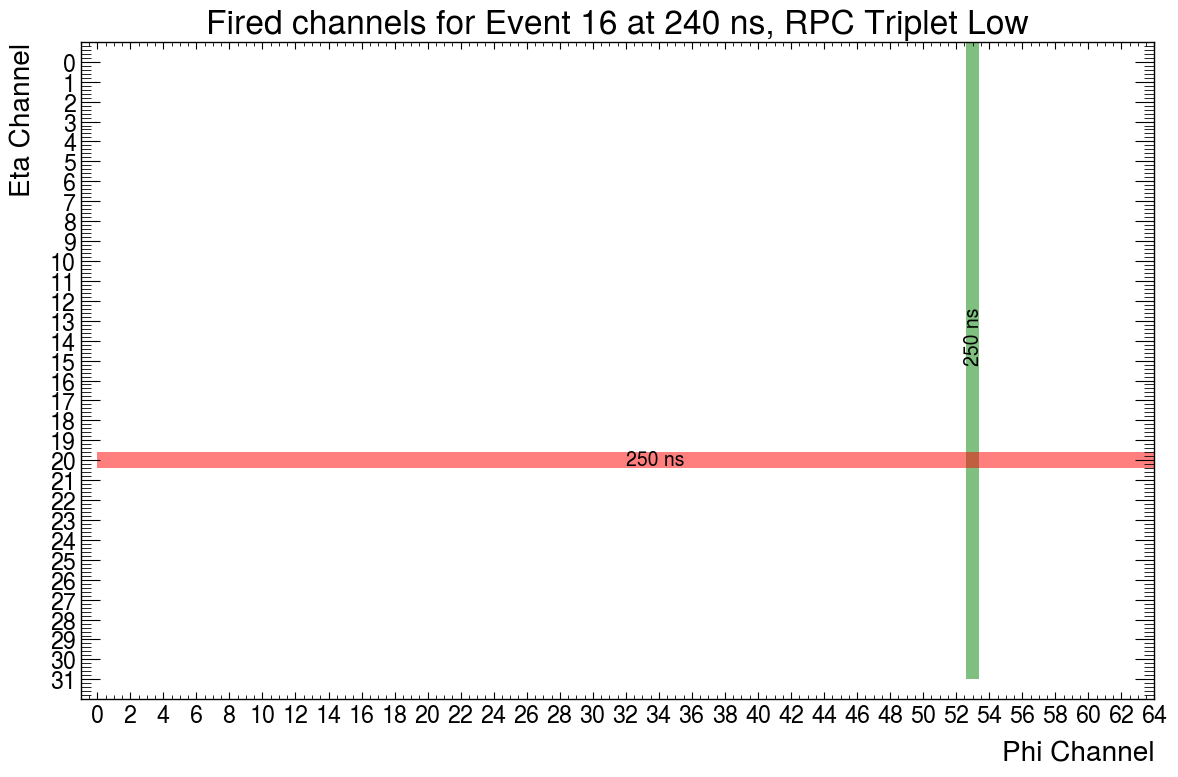

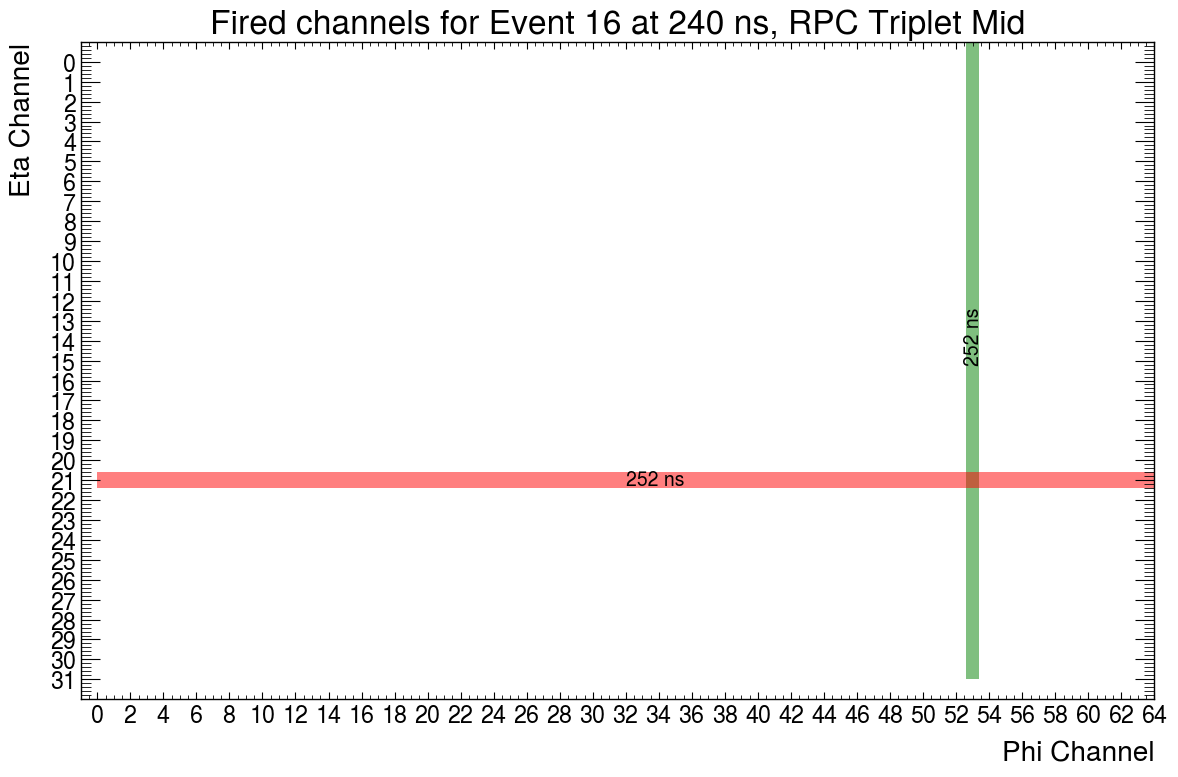

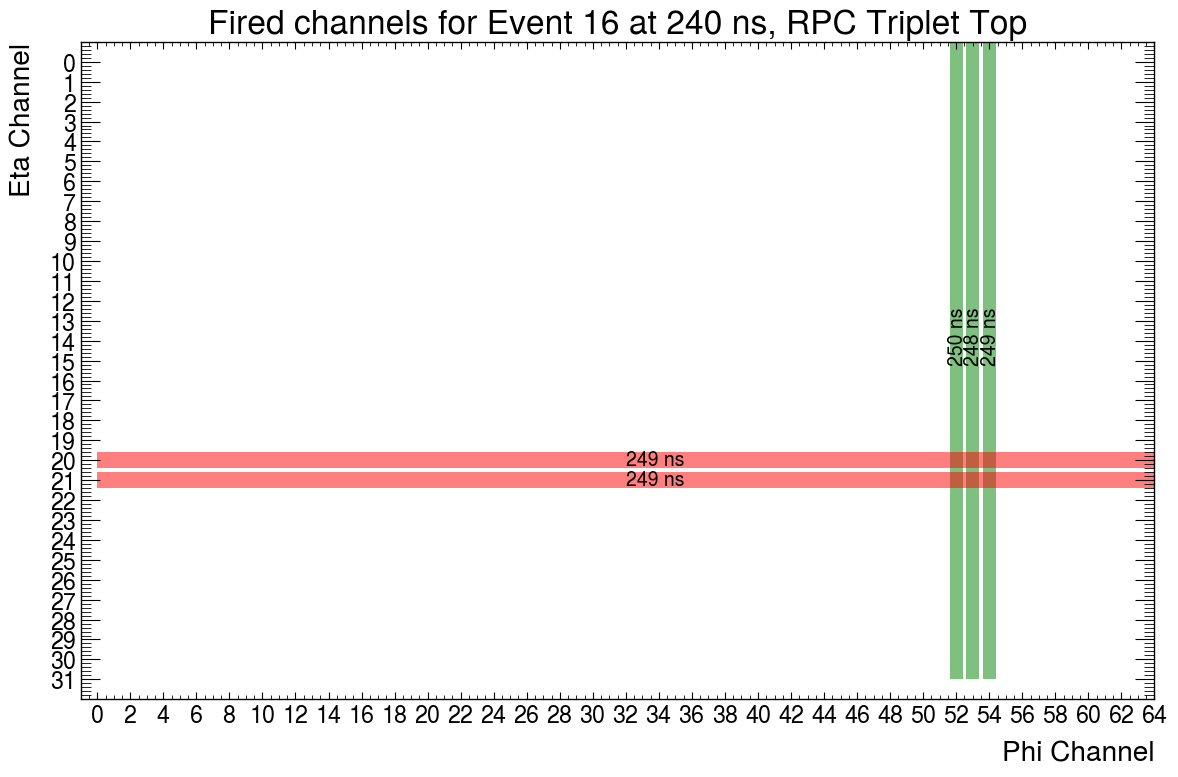

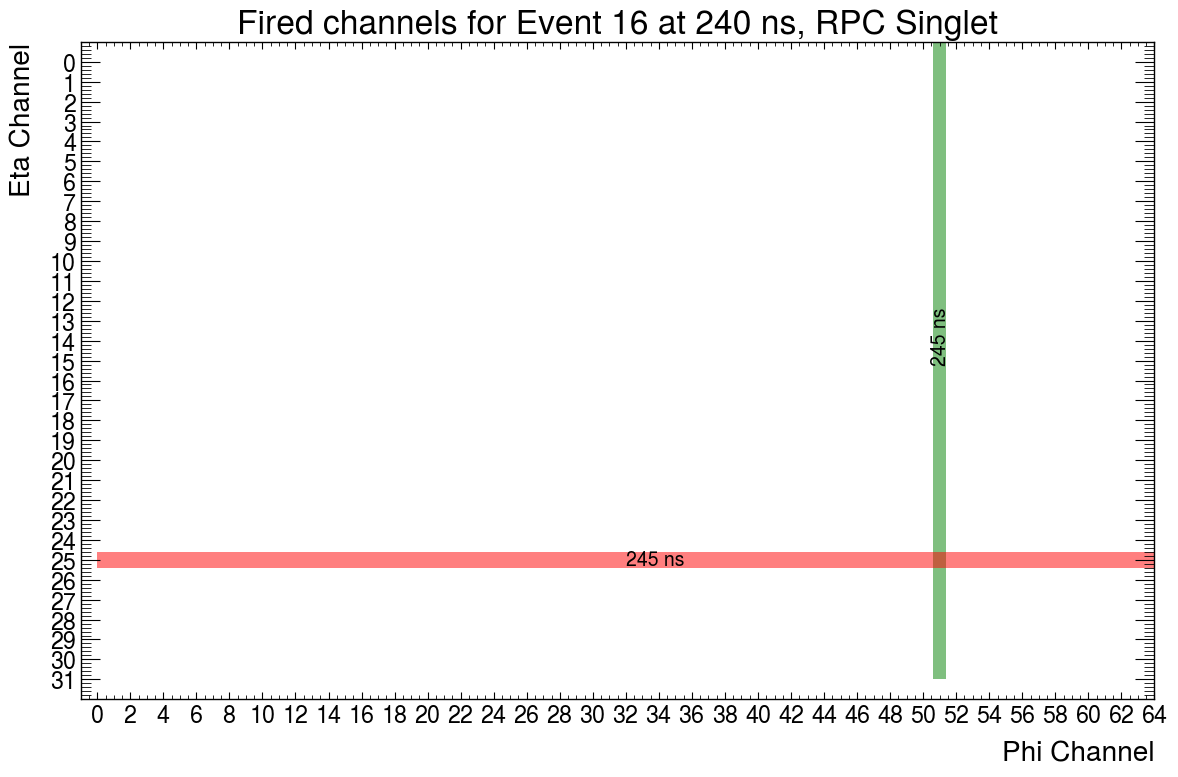

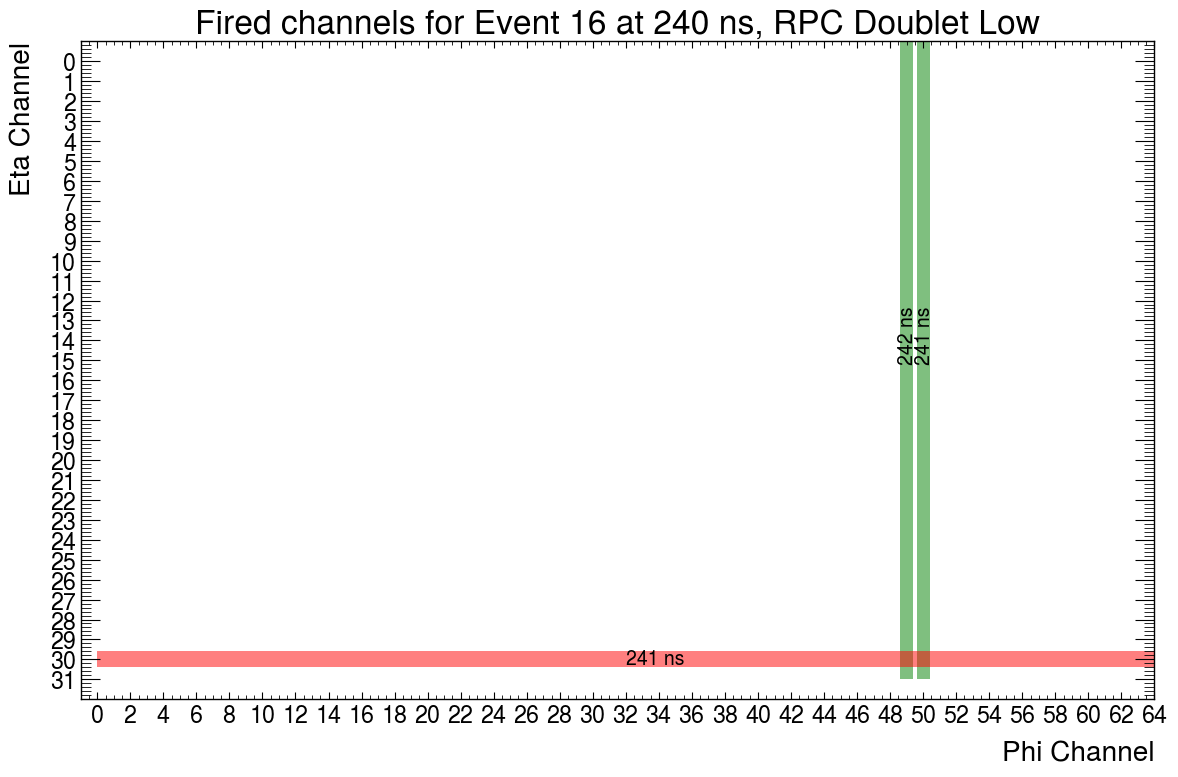

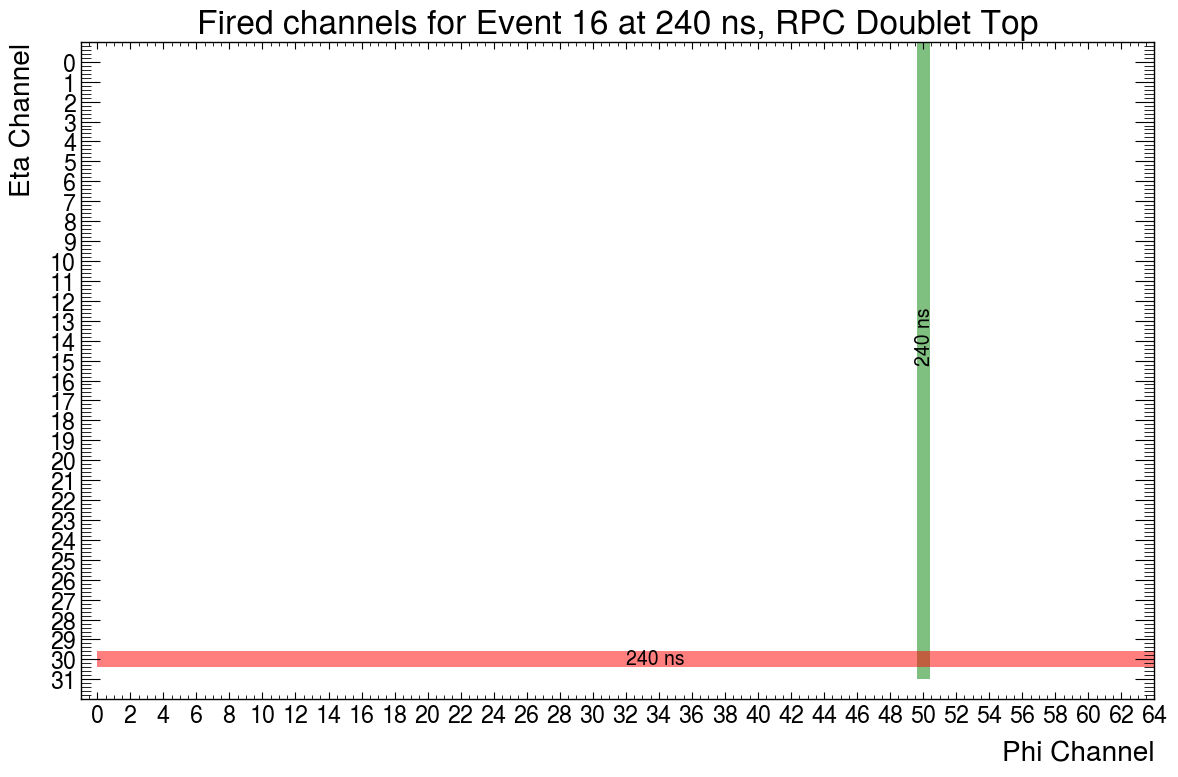

In [4]:
#Example event, Event 16, 240ns

#convert_cluster_to_plot just converts spatially clustered data into a format that can be plotted.

ANT.plot_event_cluster(ANT.convert_cluster_to_plot(all_6_rpcs[0]))

Reconstruction

Event16_240ns, All 6 RPCs

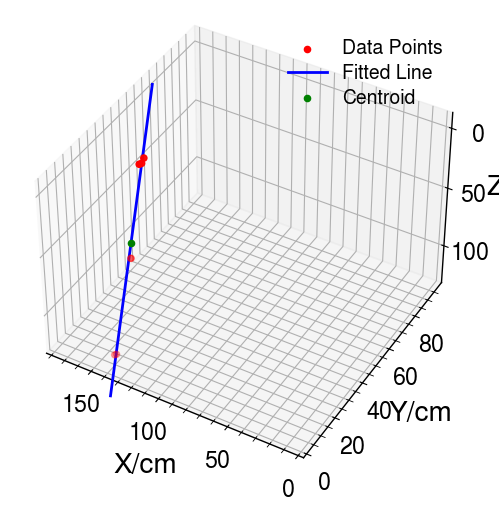

In [6]:
#Reconstruct trace w/ maximum cluster sizes of 3.

E16_240 = ANT.reconstruct(all_6_rpcs[0],3)

#ANT.reconstruct uses SVD to find optimal parametric fit to hits given maximum cluster size.

ANT.non_interactive_muon_plot(E16_240[0],E16_240[1],E16_240[2])

In [7]:
ANT.interactive_muon_plot(E16_240[0],E16_240[1],E16_240[2])

3 RPCs, Cross Chamber

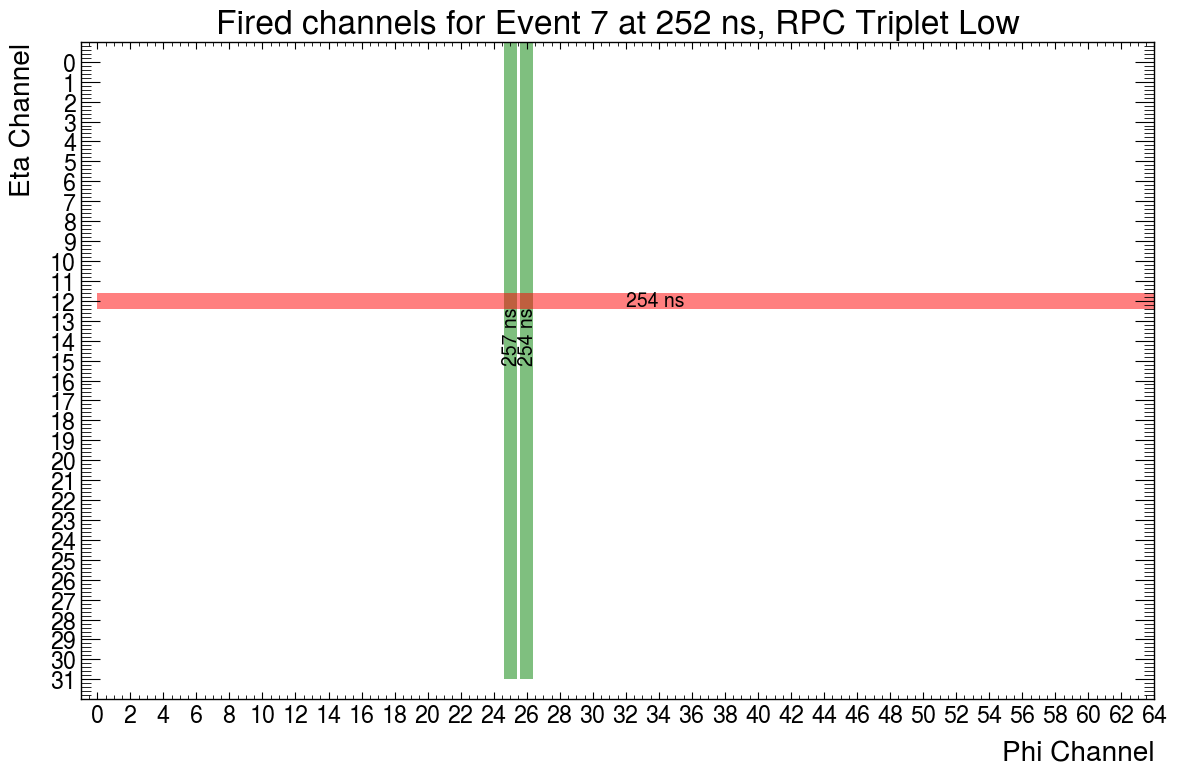

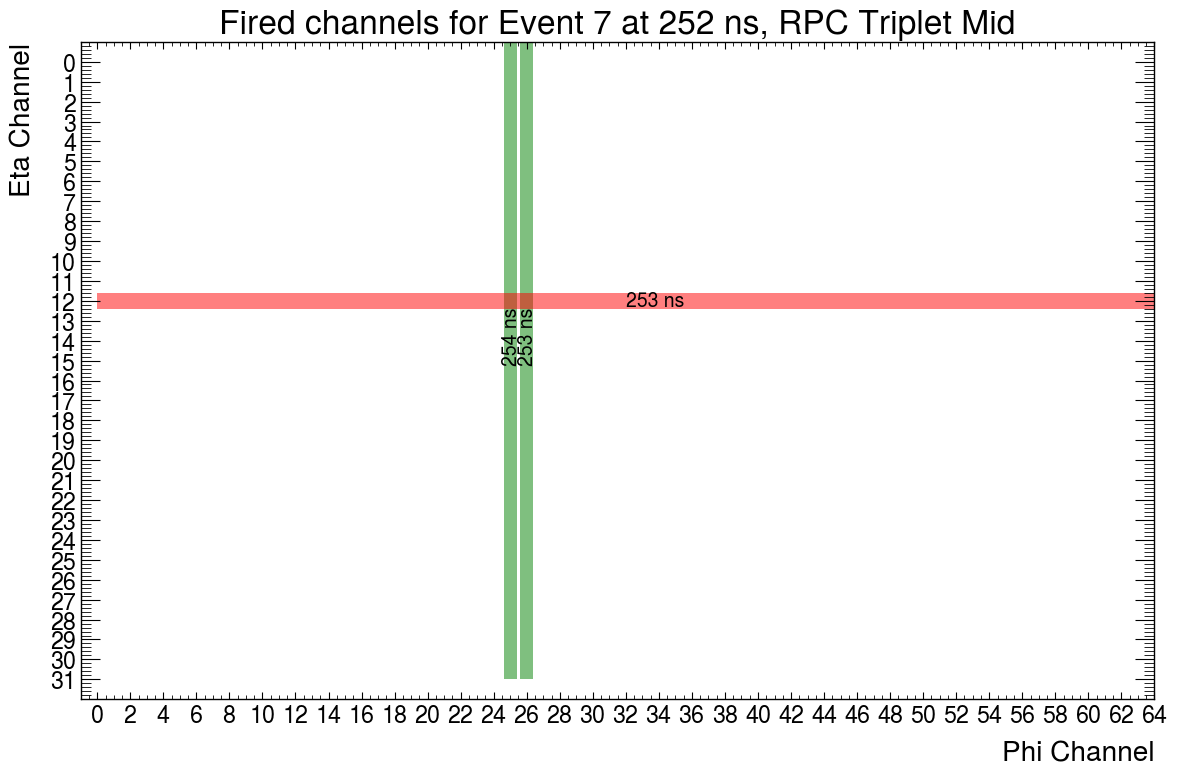

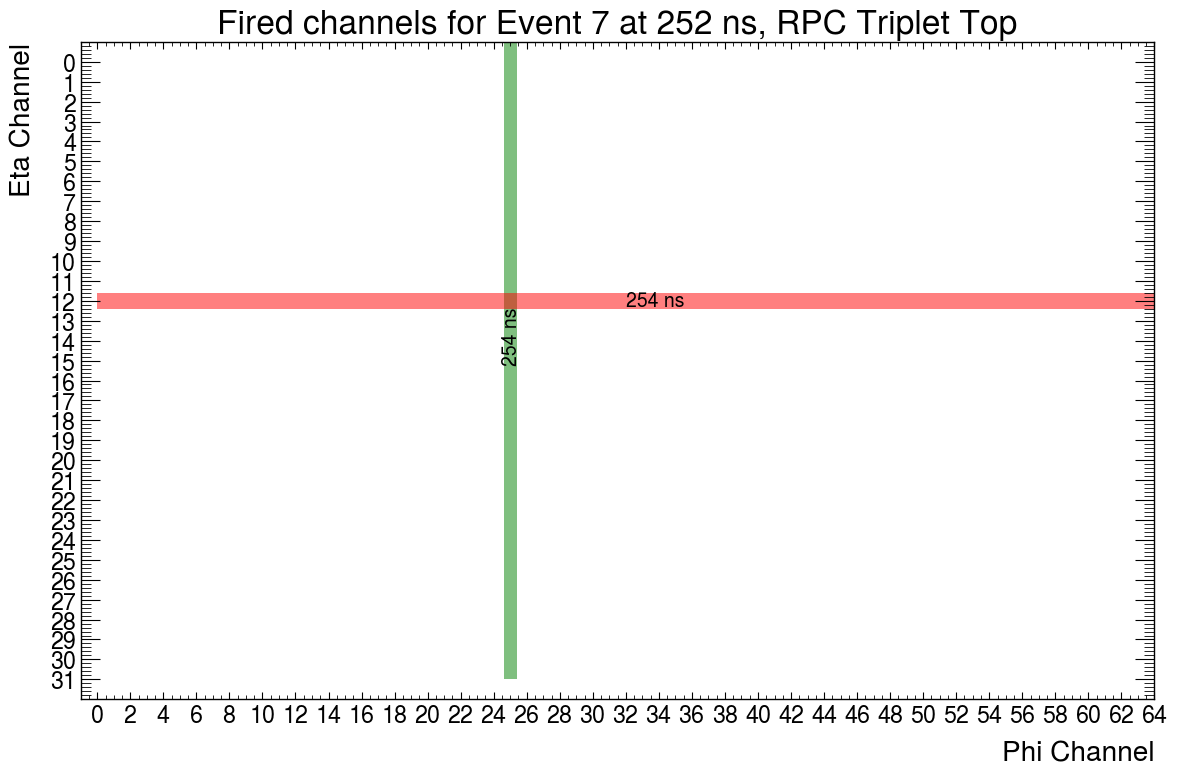

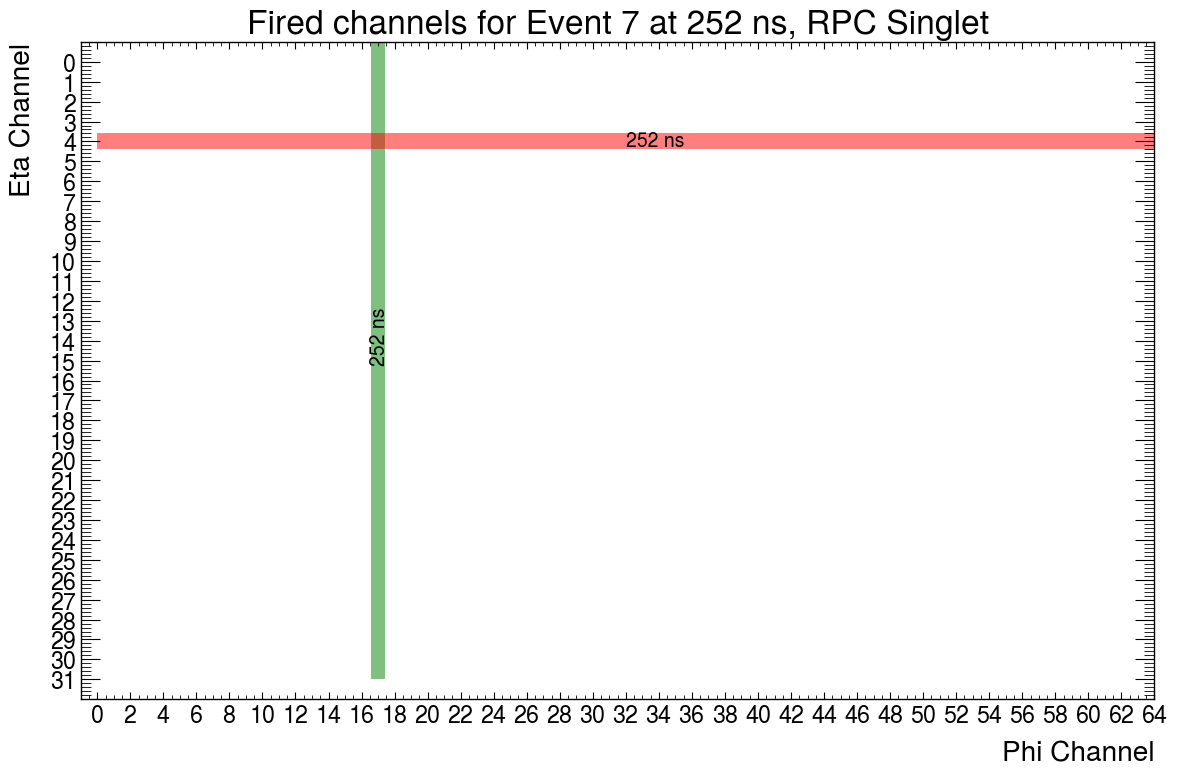

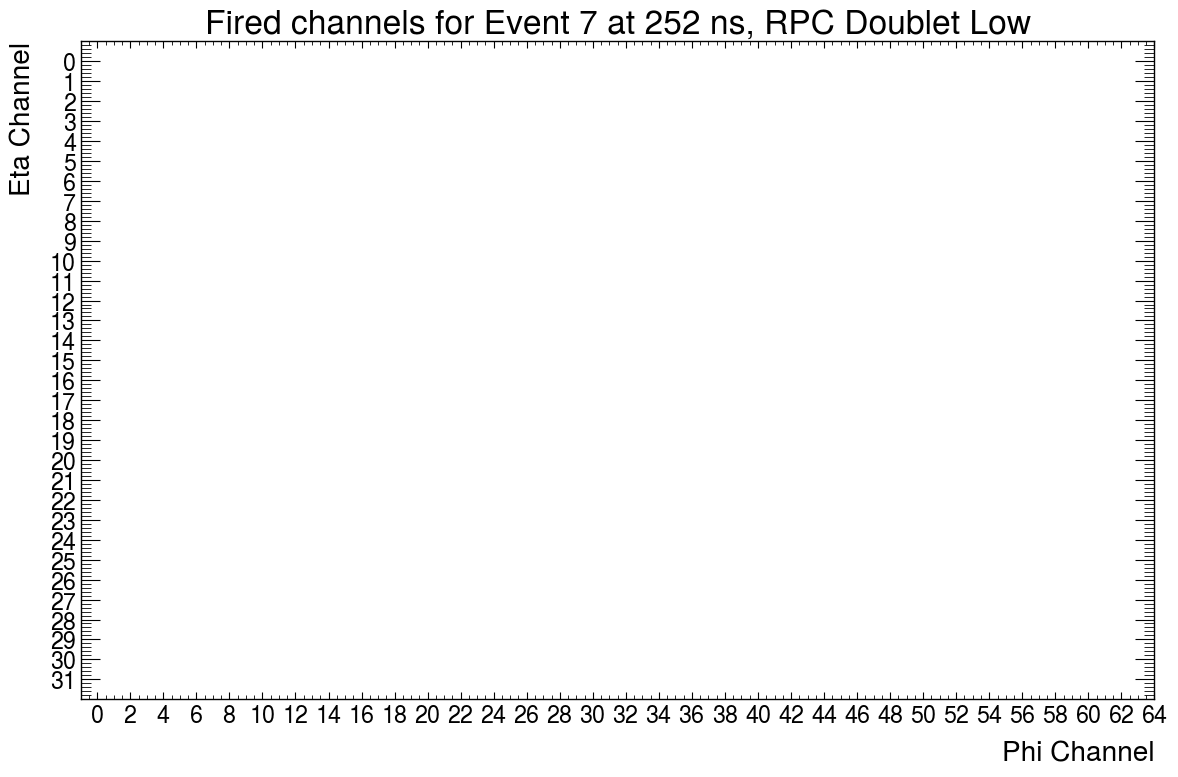

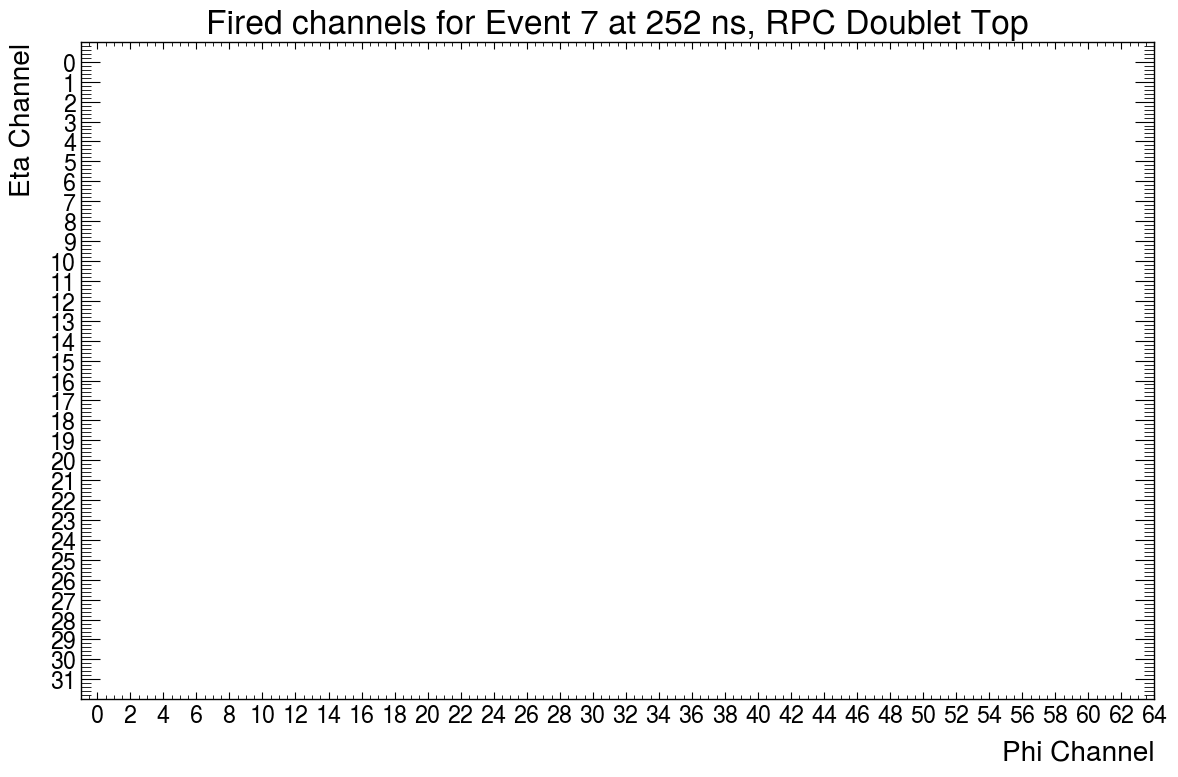

In [8]:
ANT.plot_event_cluster(ANT.convert_cluster_to_plot(cross_chamber_3_rpc_events[2]))

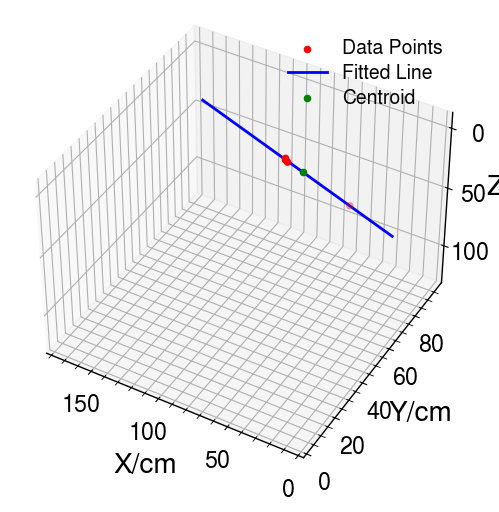

In [9]:
#Reconstruct trace w/ maximum cluster sizes of 3.

E7_252 = ANT.reconstruct(cross_chamber_3_rpc_events[2],3)

#ANT.reconstruct uses SVD to find optimal parametric fit to hits given maximum cluster size.

ANT.non_interactive_muon_plot(E7_252[0],E7_252[1],E7_252[2])

In [10]:
ANT.interactive_muon_plot(E7_252[0],E7_252[1],E7_252[2])